In [16]:
#!pip install autogluon
# !pip uninstall pandas
# !pip install pandas

In [17]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection._split import _BaseKFold
import numpy as np
import random
import numpy as np

In [18]:

# Set the random seed for Python, NumPy, MXNet, and PyTorch (if you're using them)
seed_value = 42  # Replace with your desired seed value
random.seed(seed_value)
np.random.seed(seed_value)

In [20]:
x_train_b = pd.read_csv('cleaned_data/B/x_train_b.csv')
y_train_b = pd.read_csv('cleaned_data/B/train_b.csv')
x_test_b = pd.read_csv('cleaned_data/B/x_test_b.csv')

x_train_b

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,month_sin,month_cos,day_of_year,day_of_year_sin,day_of_year_cos,direct_rad_3h_roll_avg,diffuse_rad_3h_roll_avg,direct_rad_6h_roll_avg,diffuse_rad_6h_roll_avg,direct_rad_x_sun_elevation
0,2019-01-01 00:00:00,5.525,1.23975,1200.6750,0.0,0.000,1200.6750,0.0,275.150,0.000,...,0.500000,0.866025,1,0.017166,0.999853,0.000000,0.000000,0.000000,0.000000,-0.00000
1,2019-01-01 01:00:00,5.425,1.23975,1131.4249,0.0,0.000,1131.4249,0.0,274.825,0.000,...,0.500000,0.866025,1,0.017166,0.999853,0.000000,0.000000,0.000000,0.000000,-0.00000
2,2019-01-01 02:00:00,5.400,1.23850,1061.0000,0.0,0.000,1061.0000,0.0,274.800,0.000,...,0.500000,0.866025,1,0.017166,0.999853,0.000000,0.000000,0.000000,0.000000,-0.00000
3,2019-01-01 03:00:00,5.350,1.23975,1021.1500,0.0,0.000,1021.1500,0.0,274.675,0.000,...,0.500000,0.866025,1,0.017166,0.999853,0.000000,0.000000,0.000000,0.000000,-0.00000
4,2019-01-01 04:00:00,5.675,1.23750,1033.7000,0.0,0.000,1033.7000,0.0,275.500,0.000,...,0.500000,0.866025,1,0.017166,0.999853,0.000000,0.000000,0.000000,0.000000,-0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26956,2023-04-30 19:00:00,4.550,1.27650,1677.9500,337850.1,4.225,542.8500,0.0,272.425,2.825,...,0.866025,-0.500000,120,0.882679,-0.469977,20.058333,35.033333,83.608334,94.829166,-0.01805
26957,2023-04-30 20:00:00,4.500,1.27875,1766.5000,9083.1,0.000,546.3500,0.0,272.300,0.000,...,0.866025,-0.500000,120,0.882679,-0.469977,2.458333,10.458333,52.808334,63.945835,-0.00000
26958,2023-04-30 21:00:00,4.500,1.27900,1698.9250,0.0,0.000,548.0500,0.0,272.300,0.000,...,0.866025,-0.500000,120,0.882679,-0.469977,0.033333,0.941667,26.433334,37.866667,-0.00000
26959,2023-04-30 22:00:00,4.500,1.27975,1354.8250,0.0,0.000,527.6000,0.0,272.275,0.000,...,0.866025,-0.500000,120,0.882679,-0.469977,0.000000,0.000000,10.029167,17.516666,-0.00000


In [24]:
x_train_b_combined = x_train_b.merge(y_train_b, left_on='date_forecast', right_on='time', how='left')
x_train_b_combined['observed'] = x_train_b_combined['calc_year'].isna().astype(int)

train_data_b = x_train_b_combined.drop(['time', 'calc_year', 'calc_month', 'calc_day', 'calc_hour','hour_sin','hour_cos','month_sin','month_cos','day_of_year_sin','day_of_year_cos','direct_rad_3h_roll_avg','diffuse_rad_3h_roll_avg','direct_rad_6h_roll_avg','diffuse_rad_6h_roll_avg', 'day_of_year','date_forecast'], axis = 1)
x_test_b['observed'] = x_test_b['calc_year'].isna().astype(int)
test_data_b = x_test_b.drop([ 'calc_year', 'calc_month', 'calc_day', 'calc_hour','hour_sin','hour_cos','month_sin','month_cos','day_of_year_sin','day_of_year_cos','direct_rad_3h_roll_avg','diffuse_rad_3h_roll_avg','direct_rad_6h_roll_avg','diffuse_rad_6h_roll_avg', 'day_of_year','date_forecast'], axis = 1)

In [26]:
test_data_b

,location,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,...,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,direct_rad_x_sun_elevation,observed
0,B,4.300,1.28300,912.3000,0.0,0.000,1059.750,0.0,271.65002,0.000,...,3.950,2.100,3.375,0.0,2023,5,1,0,-0.000000,0
1,B,4.250,1.28300,1482.8002,0.0,0.000,1073.700,0.0,271.45000,0.000,...,3.825,1.925,3.300,0.0,2023,5,1,1,-0.000000,0
2,B,4.150,1.28275,1765.9000,0.0,0.000,1200.100,0.0,271.05000,0.000,...,3.650,1.750,3.225,0.0,2023,5,1,2,-0.000000,0
3,B,4.025,1.28225,2269.7500,40510.2,11.675,1179.000,0.0,270.65000,9.375,...,3.500,1.475,3.150,0.0,2023,5,1,3,2.967300,0
4,B,3.900,1.28200,2198.2250,567057.1,76.900,919.150,0.0,270.37500,47.400,...,3.325,1.300,3.075,0.0,2023,5,1,4,190.086060,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,B,8.350,1.19800,3640.1250,1908360.9,85.100,2015.750,0.0,281.57500,33.625,...,2.475,2.075,-1.350,0.0,2023,7,3,19,109.454025,0
716,B,8.525,1.20075,3351.1000,737351.8,24.800,1613.375,0.0,281.85000,14.350,...,2.450,2.100,-1.275,0.0,2023,7,3,20,11.602287,0
717,B,8.800,1.20375,2753.0250,149728.8,1.275,1624.450,0.0,282.30000,1.300,...,2.575,2.150,-1.400,0.0,2023,7,3,21,-0.000000,0
718,B,9.000,1.20600,2204.5000,1440.5,0.000,1768.325,0.0,282.67502,0.000,...,2.250,1.800,-1.350,0.0,2023,7,3,22,-0.000000,0


,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,direct_rad_x_sun_elevation,pv_measurement,observed
0,7.700,1.22825,1728.950,0.00,0.000,1728.950,0.0,280.300,0.000,0.0,...,-3.575,-0.500,0.0,2019,6,2,22,-0.000000,0.00,1
1,7.700,1.22350,1689.825,0.00,0.000,1689.825,0.0,280.300,0.000,0.0,...,-3.350,0.275,0.0,2019,6,2,23,-0.000000,0.00,1
2,7.875,1.21975,1563.225,0.00,0.000,1563.225,0.0,280.650,0.000,0.0,...,-2.950,0.750,0.0,2019,6,3,0,-0.000000,0.00,1
3,8.425,1.21800,1283.425,834.60,0.750,1283.425,0.0,281.675,0.300,2107.1,...,-2.600,0.875,0.0,2019,6,3,1,-0.000000,0.00,1
4,8.950,1.21800,1003.500,129872.60,23.100,1003.500,0.0,282.500,11.975,88275.8,...,-2.350,0.925,0.0,2019,6,3,2,0.457688,19.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34080,4.550,1.27650,1674.200,337859.78,4.225,542.700,0.0,272.425,2.825,225724.2,...,4.800,1.925,0.0,2023,4,30,19,-0.018050,9.02,0
34081,4.500,1.27975,1762.400,9083.50,0.000,546.400,0.0,272.300,0.000,20271.5,...,4.025,2.300,0.0,2023,4,30,20,-0.000000,0.00,0
34082,4.500,1.28100,1696.650,0.00,0.000,548.350,0.0,272.300,0.000,0.0,...,3.575,2.600,0.0,2023,4,30,21,-0.000000,0.00,0
34083,4.500,1.28100,1353.400,0.00,0.000,527.775,0.0,272.300,0.000,0.0,...,3.175,2.550,0.0,2023,4,30,22,-0.000000,0.00,0


# Trying with validation set equal to half of the estimated data


In [28]:
def split_dataset(train_data, observed_column='observed'):
    """
    Splits the dataset into a training set and a validation set.
    The validation set contains the last half of the rows where observed = 0,
    and the training set contains the rest.

    :param train_data: The original training dataset as a pandas DataFrame.
    :param observed_column: The name of the column that indicates if the row is observed.
    :return: A tuple (training_set, validation_set)
    """

    # Filter rows where observed = 0
    observed_zero = train_data[train_data[observed_column] == 0]

    # Split the filtered dataset into two
    half_index = len(observed_zero) // 2
    validation_set = observed_zero[half_index:]

    # Combine the first half of observed_zero with the rest of the data where observed != 0
    training_set = pd.concat([train_data[train_data[observed_column] != 0], observed_zero[:half_index]])

    return training_set, validation_set


# Example usage:
# train_data_a, val_data_a = split_dataset(train_data_a, 'observed')
# train_data_b, val_data_b = split_dataset(train_data_b, 'observed')
# train_data_c, val_data_c = split_dataset(train_data_c, 'observed')


In [29]:

#val_data_a.head()

No path specified. Models will be saved in: "AutogluonModels\ag-20231106_111134\"
Presets specified: ['best_quality']
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\utils.py:549: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 100s
AutoGluon will save models to "AutogluonModels\ag-20231106_111134\"
AutoGluon Version:  0.8.2
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   704.06 GB / 1022.87 GB (68.8%)
Train Data Rows:    34085
Train Data Columns: 51
Label Column: pv_measurement
Preprocessing data ...
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\utils

In [31]:
predictor_b= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_b, verbosity = 2,presets='best_quality', time_limit= 100)

No path specified. Models will be saved in: "AutogluonModels\ag-20231106_111316\"
Presets specified: ['best_quality']
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\utils.py:549: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 100s
AutoGluon will save models to "AutogluonModels\ag-20231106_111316\"
AutoGluon Version:  0.8.2
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   704.04 GB / 1022.87 GB (68.8%)
Train Data Rows:    26961
Train Data Columns: 51
Label Column: pv_measurement
Preprocessing data ...
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\utils

No path specified. Models will be saved in: "AutogluonModels\ag-20231106_111459\"
Presets specified: ['best_quality']
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\utils.py:549: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 100s
AutoGluon will save models to "AutogluonModels\ag-20231106_111459\"
AutoGluon Version:  0.8.2
Python Version:     3.9.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Disk Space Avail:   704.01 GB / 1022.87 GB (68.8%)
Train Data Rows:    21684
Train Data Columns: 51
Label Column: pv_measurement
Preprocessing data ...
c:\Users\holwe\miniconda3\lib\site-packages\autogluon\core\utils\utils

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-267.685185,1.971009,0.332463,0.000000,0.218951,2,True,3
1,KNeighborsUnif_BAG_L1,-267.707340,0.964720,0.050000,0.964720,0.050000,1,True,1
2,KNeighborsDist_BAG_L1,-269.111756,1.006289,0.063513,1.006289,0.063513,1,True,2


In [34]:
predictor_b.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-40.354287,1.299392,0.276526,0.001001,0.183523,2,True,3
1,KNeighborsUnif_BAG_L1,-40.354606,0.674721,0.037999,0.674721,0.037999,1,True,1
2,KNeighborsDist_BAG_L1,-40.614342,0.623670,0.055004,0.623670,0.055004,1,True,2


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-32.956333,0.823769,0.253804,0.000000,0.175807,2,True,3
1,KNeighborsUnif_BAG_L1,-32.988268,0.412117,0.032000,0.412117,0.032000,1,True,1
2,KNeighborsDist_BAG_L1,-33.045750,0.411652,0.045998,0.411652,0.045998,1,True,2


date_forecast                    0
absolute_humidity_2m:gm3        24
air_density_2m:kgm3             24
ceiling_height_agl:m          6151
clear_sky_energy_1h:J            0
                              ... 
diffuse_rad_6h_roll_avg         19
direct_rad_x_sun_elevation      24
time                             0
pv_measurement                   0
observed                         0
Length: 69, dtype: int64


In [37]:
nan_counts = x_train_b_combined.isna().sum()
print(nan_counts)

date_forecast                    0
absolute_humidity_2m:gm3        24
air_density_2m:kgm3             24
ceiling_height_agl:m          4229
clear_sky_energy_1h:J            0
                              ... 
diffuse_rad_6h_roll_avg         19
direct_rad_x_sun_elevation      24
time                             0
pv_measurement                   0
observed                         0
Length: 69, dtype: int64


date_forecast                    0
absolute_humidity_2m:gm3        24
air_density_2m:kgm3             24
ceiling_height_agl:m          4457
clear_sky_energy_1h:J            0
                              ... 
diffuse_rad_6h_roll_avg         19
direct_rad_x_sun_elevation      24
time                             0
pv_measurement                   0
observed                         0
Length: 69, dtype: int64


These features in provided data are not utilized by the predictor and will be ignored: ['snow_drift:idx']
Computing feature importance via permutation shuffling for 50 features using 5000 rows with 10 shuffle sets... Time limit: 500s...
	275.23s	= Expected runtime (27.52s per shuffle set)
	142.52s	= Actual runtime (Completed 10 of 10 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
direct_rad_1h:J,4.234930e+02,1.023146e+01,2.252831e-16,10,4.340077e+02,4.129782e+02
clear_sky_energy_1h:J,2.903054e+02,1.087319e+01,1.161760e-14,10,3.014797e+02,2.791312e+02
diffuse_rad_1h:J,1.369839e+02,5.130030e+00,1.160519e-14,10,1.422560e+02,1.317119e+02
visibility:m,1.327004e+01,6.925697e-01,2.289874e-13,10,1.398179e+01,1.255830e+01
direct_rad_x_sun_elevation,4.602912e+00,1.728048e-01,1.186582e-14,10,4.780501e+00,4.425322e+00
ceiling_height_agl:m,3.542548e+00,1.309915e-01,1.035149e-14,10,3.677166e+00,3.407929e+00
cloud_base_agl:m,2.485212e+00,8.700623e-02,6.332346e-15,10,2.574627e+00,2.395796e+00
clear_sky_rad:W,4.720793e-01,1.299696e-02,7.295756e-16,10,4.854361e-01,4.587225e-01
direct_rad:W,2.228832e-01,4.597916e-03,5.438933e-17,10,2.276084e-01,2.181580e-01
sun_azimuth:d,1.870471e-01,2.827122e-03,3.311439e-18,10,1.899525e-01,1.841417e-01


,pv_measurement
0,0.000000
1,0.359204
2,0.000000
3,68.532913
4,194.236526
...,...
715,484.790619
716,65.213776
717,14.923312
718,7.270656


In [42]:
y_pred_b = predictor_b.predict(test_data_b)
y_pred_b=pd.DataFrame(y_pred_b,columns=['pv_measurement'])
y_pred_b#print the DataFrame

,pv_measurement
0,0.000000
1,0.000000
2,0.000000
3,5.712204
4,25.952126
...,...
715,91.428368
716,25.097666
717,1.892655
718,0.342999


In [43]:
y_pred_b.to_csv('autogluon_b')

,pv_measurement
0,0.000000
1,0.000000
2,0.000000
3,2.516609
4,36.072952
...,...
715,41.113247
716,13.955208
717,5.959343
718,0.000000


In [44]:
import os
output_dir = 'autogluon'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the dataframes into the folder
y_pred_b.to_csv(os.path.join(output_dir, 'y_pred_b.csv'))

,pv_measurement
2155,41.113247
2156,13.955208
2157,5.959343
2158,0.000000
2159,0.000000


,prediction
0,0.000000
1,0.359204
2,0.000000
3,68.532913
4,194.236526
...,...
2155,41.113247
2156,13.955208
2157,5.959343
2158,0.000000


,pv_measurement
0,0.000000
1,0.000000
2,0.000000
3,2.447617
4,6.772253
...,...
34080,42.587318
34081,10.217830
34082,0.000000
34083,0.000000


,time,pv_measurement
0,2019-06-02 22:00:00,0.00
1,2019-06-02 23:00:00,0.00
2,2019-06-03 00:00:00,0.00
3,2019-06-03 01:00:00,0.00
4,2019-06-03 02:00:00,19.36
...,...,...
34080,2023-04-30 19:00:00,9.02
34081,2023-04-30 20:00:00,0.00
34082,2023-04-30 21:00:00,0.00
34083,2023-04-30 22:00:00,0.00


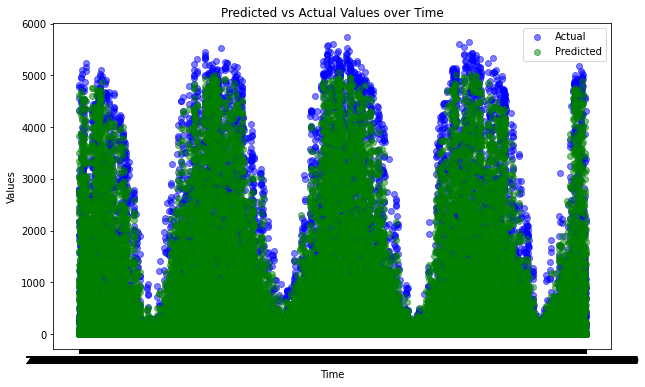

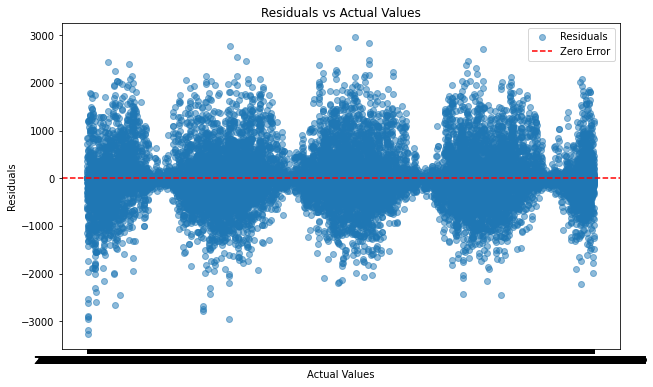

In [51]:

residuals = y_train_a - pred_a_whole
residuals_with_time = residuals.rename(columns= {'pv_measurement':'residuals'})
residuals_with_time['time'] = time_values
residuals_with_time

residuals_with_time.set_index('time')

,residuals
time,
2019-06-02 22:00:00,0.000000
2019-06-02 23:00:00,0.000000
2019-06-03 00:00:00,0.000000
2019-06-03 01:00:00,-2.447617
2019-06-03 02:00:00,12.587747
...,...
2023-04-30 19:00:00,-33.567318
2023-04-30 20:00:00,-10.217830
2023-04-30 21:00:00,0.000000


,residuals
time,
2019-06-03 08:00:00,847.536738
2019-06-03 09:00:00,719.366240
2019-06-03 10:00:00,-586.029551
2019-06-03 11:00:00,-1148.709365
2019-06-03 18:00:00,-642.441157
...,...
2023-04-30 10:00:00,-1210.288330
2023-04-30 12:00:00,1156.401699
2023-04-30 13:00:00,1197.584092


,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,direct_rad_x_sun_elevation,pv_measurement,observed,time,residuals
0,9.850000,1.20250,654.42500,8968757.0,674.70000,654.42500,0.0,284.15,215.62500,3119993.8,...,0.0,2019,6,3,8,518.5806,2189.88,1,2019-06-03 08:00:00,847.536738
1,10.075001,1.19850,997.60004,10340040.0,756.55000,997.60004,0.0,284.50,265.57500,3464514.2,...,0.0,2019,6,3,9,2670.3330,3047.22,1,2019-06-03 09:00:00,719.366240
2,9.975000,1.18950,1940.00000,11294876.0,806.47500,1940.00000,0.0,284.50,267.75000,3839773.8,...,0.0,2019,6,3,10,13069.3125,2163.26,1,2019-06-03 10:00:00,-586.029551
3,9.900000,1.18000,2910.65000,11761468.0,820.94995,2910.65000,0.0,284.50,199.82500,3366538.0,...,0.0,2019,6,3,11,21901.4220,2686.64,1,2019-06-03 11:00:00,-1148.709365
4,10.725000,1.19925,1605.57500,3192082.2,162.32500,1605.57500,0.0,285.45,56.37500,967743.0,...,0.0,2019,6,3,18,738.1957,340.12,1,2019-06-03 18:00:00,-642.441157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447,5.275000,1.26525,1910.70000,9674970.0,695.00000,496.09998,0.0,274.50,294.10000,4123328.5,...,0.0,2023,4,30,10,5100.8240,346.50,0,2023-04-30 10:00:00,-1210.288330
5448,5.250000,1.26200,2773.72500,10096505.0,686.10000,424.40000,0.0,274.60,256.72500,3519637.0,...,0.0,2023,4,30,12,2697.4460,4318.16,0,2023-04-30 12:00:00,1156.401699
5449,4.950000,1.26175,3951.92500,9486127.0,625.60000,627.32500,0.0,273.70,253.97499,3677273.2,...,0.0,2023,4,30,13,3971.2922,3374.14,0,2023-04-30 13:00:00,1197.584092
5450,4.725000,1.26275,4965.75000,8377467.0,533.12500,736.87500,0.0,273.05,185.32500,3162812.0,...,0.0,2023,4,30,14,5807.9400,2170.74,0,2023-04-30 14:00:00,820.224253


SyntaxError: EOL while scanning string literal (1256647608.py, line 23)